In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv("/workspace/Projects/Telco-Customer-Churn.csv")
df.head()

#As i have downloaded the dataset from kaggle it's already preprocessed


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Adding dummy behavioral features using numpy
np.random.seed(42)
df["Session_Duration"]=np.random.randint(10,120,df.shape[0])

df['Logins']=np.random.randint(1,30,df.shape[0])

df['Sub-Tenure']=np.random.randint(1,24,df.shape[0])

#Defining Churn
df["Churn"]=(df['Logins']<5)|(df['Session_Duration']<20)
df['Churn']=df['Churn'].astype(int)

/tmp/ipykernel_1533/2422419260.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values,y=correlation.index,palette='viridis')


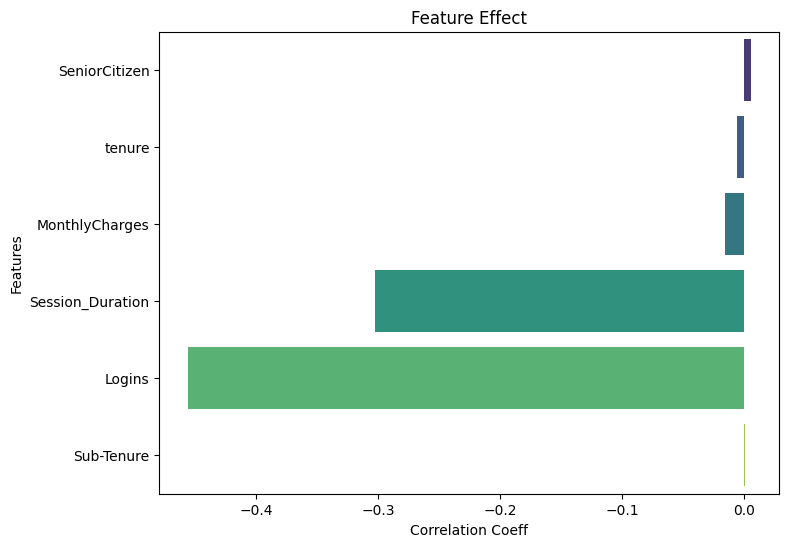

In [4]:
#Converting the data to a numeric correlation
ndf=df.select_dtypes(include=["float64","int64"])
ndf["Churn"]=df["Churn"]

#Seeing how the created features effect the dataset using bar graph
correlation=ndf.corr()["Churn"].drop("Churn")
plt.figure(figsize=(8,6))
sns.barplot(x=correlation.values,y=correlation.index,palette='viridis')
plt.title("Feature Effect")
plt.xlabel("Correlation Coeff")
plt.ylabel("Features")
plt.show()

#The bar graph below shows the contribution of each feature to the model's decision making process


In [5]:
#Seperating the feature matrix and target series
X=df[["Session_Duration","Logins","Sub-Tenure"]]
y=df["Churn"]

#Creating the training and testing features and target using train test split
X1,X2,y1,y2=train_test_split(X,y,test_size=0.2,random_state=42)

#Training the model using Random forest classifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X1,y1)

#Creating the prediction on the test data X2
pred=model.predict(X2)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1121
           1       1.00      1.00      1.00       288

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix
: [[1121    0]
 [   0  288]]

ROC AUC Score:
 1.0


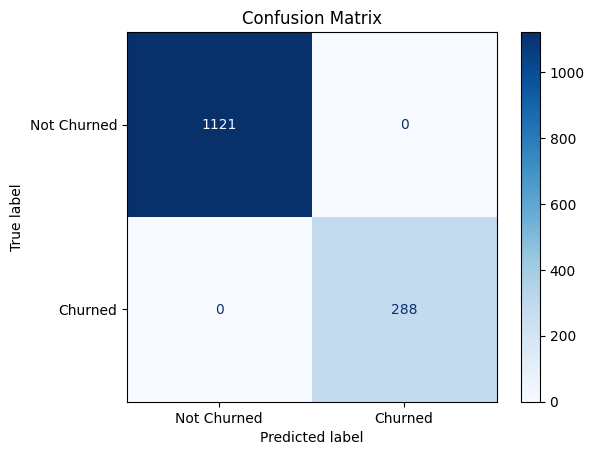

In [6]:
print("\nClassification Report:\n",classification_report(y2,pred))
print("\nConfusion Matrix\n:",confusion_matrix(y2,pred))
print("\nROC AUC Score:\n",roc_auc_score(y2,pred))


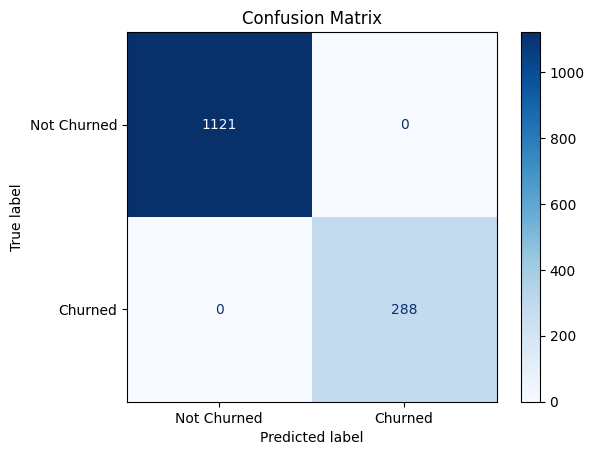

In [7]:
#Creating a confusion matrix that shows the breadown of Predicted and Actual outcomes
cm=confusion_matrix(y2,pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churned","Churned"])
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()